<a href="https://colab.research.google.com/github/SangMini2/Project_Hanium/blob/main/Project_sangminlee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import os
import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


import seaborn as sns

%matplotlib inline
import itertools
from google.colab import files
import io


In [2]:
uploaded = files.upload()

Saving real.csv to real.csv


In [3]:
df = pd.read_csv(io.StringIO(uploaded['real.csv'].decode("utf-8")))
df["날짜"] = pd.to_datetime(df["날짜"])

df.index = df["날짜"]
PM10 = df["PM10"]

In [4]:
PM10_df = df.loc[: , ["날짜" , "PM10"]]
PM10_df.index = PM10_df.날짜
data = PM10_df.drop("날짜", axis = 1)
data

,PM10
날짜,
2012-01-01,78.708
2012-01-02,48.875
2012-01-03,70.625
2012-01-04,56.750
2012-01-05,50.625
...,...
2021-12-26,9.917
2021-12-27,15.750
2021-12-29,37.708


In [ ]:
PM10

날짜
2012-01-01    78.708
2012-01-02    48.875
2012-01-03    70.625
2012-01-04    56.750
2012-01-05    50.625
               ...  
2021-12-26     9.917
2021-12-27    15.750
2021-12-29    37.708
2021-12-30    25.250
2021-12-31    16.125
Name: PM10, Length: 2891, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


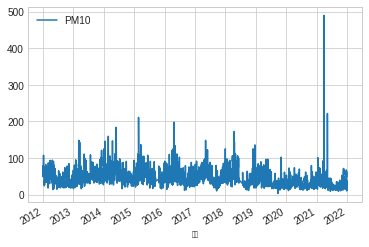

In [ ]:
data.plot()

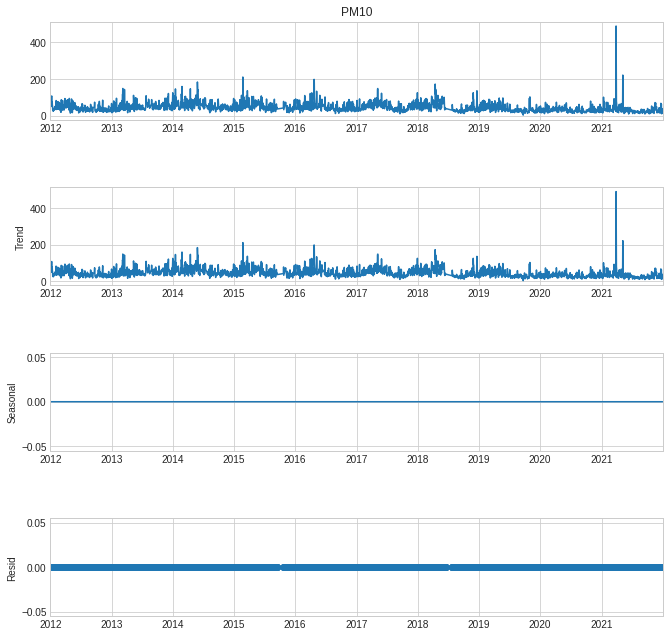

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data["PM10"] , model = "additive" , period = 1)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

In [5]:
# 훈련 데이터와 예측 데이터 나누기. 시계열 데이터니까 무작위 섞기는 False
train_data , test_data = train_test_split(data, test_size = 0.2 , shuffle = False)

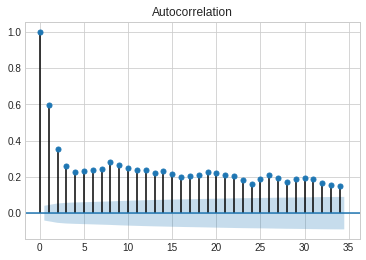

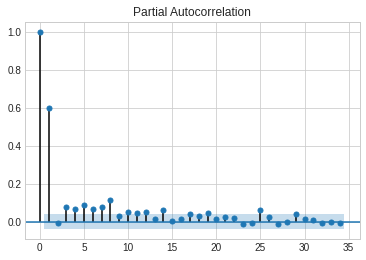

In [6]:
plot_acf(train_data)
plot_pacf(train_data)
plt.show()


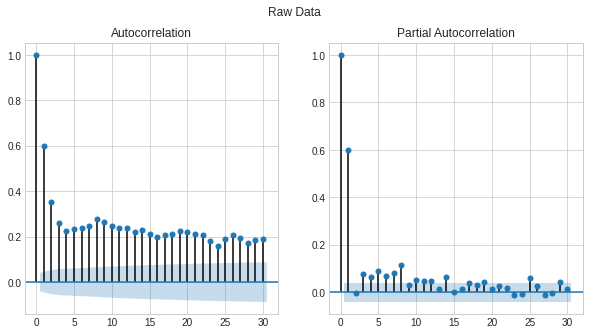

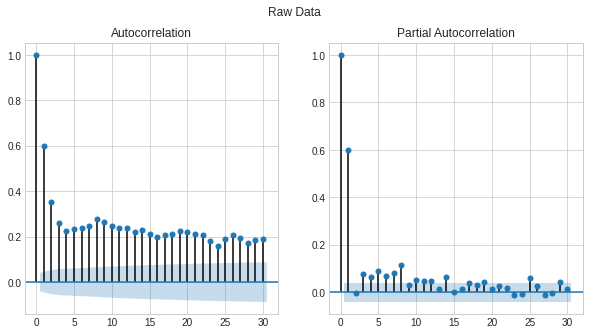

In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Raw Data")
sm.graphics.tsa.plot_acf(train_data.values.squeeze() , lags = 30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze() , lags = 30 , ax = ax[1])


In [ ]:
#위의 그래프를 보니까 ACF가 천천히 떨어지는 모습을 보이니까 Non-stationary임을 확인
#차분을 함

In [8]:
#Differencing

diff_train_data = train_data.copy()
diff_train_data = diff_train_data["PM10"].diff()
diff_train_data = diff_train_data.dropna()

print("###### Raw Data #######")
print(train_data)
print("#### Differenced Data ####")
print(diff_train_data)

###### Raw Data #######
              PM10
날짜                
2012-01-01  78.708
2012-01-02  48.875
2012-01-03  70.625
2012-01-04  56.750
2012-01-05  50.625
...            ...
2019-12-12  15.375
2019-12-13  26.292
2019-12-14  33.958
2019-12-15  20.792
2019-12-16  28.083

[2312 rows x 1 columns]
#### Differenced Data ####
날짜
2012-01-02   -29.833
2012-01-03    21.750
2012-01-04   -13.875
2012-01-05    -6.125
2012-01-06     5.708
               ...  
2019-12-12   -38.500
2019-12-13    10.917
2019-12-14     7.666
2019-12-15   -13.166
2019-12-16     7.291
Name: PM10, Length: 2311, dtype: float64


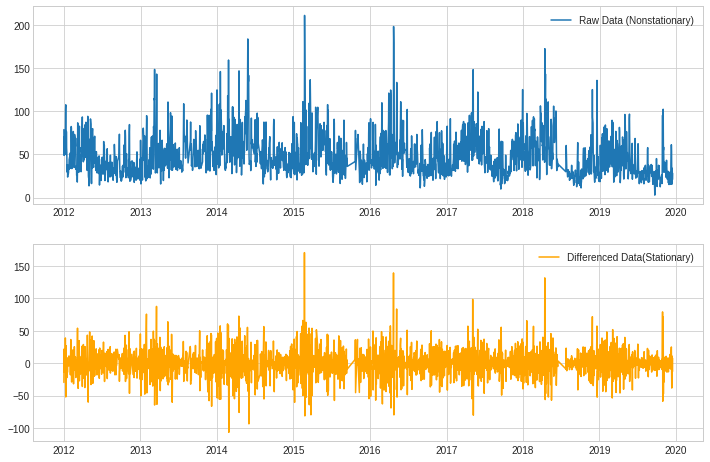

In [9]:
plt.figure(figsize = (12,8))
plt.subplot(211)
plt.plot(train_data["PM10"])
plt.legend(["Raw Data (Nonstationary)"])
plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(["Differenced Data(Stationary)"])
plt.show()


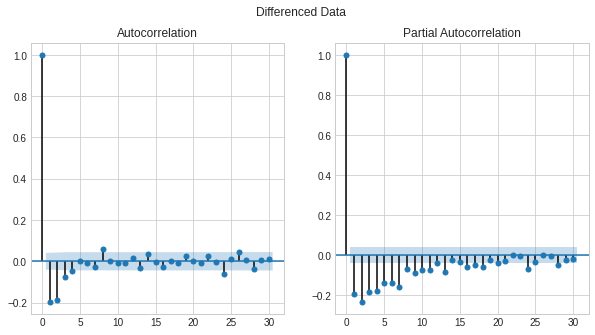

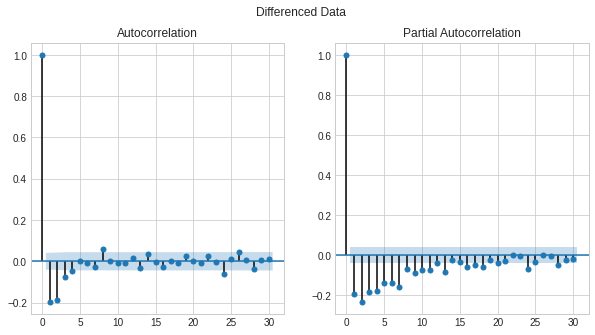

In [10]:
#ACF , PACF plot
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Differenced Data")
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax = ax[1])


In [ ]:
train_data.values

array([[78.708],
       [48.875],
       [70.625],
       ...,
       [33.958],
       [20.792],
       [28.083]])

In [ ]:
model = ARIMA(train_data.values, order = (1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2312
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -10265.137
Date:                Fri, 26 Aug 2022   AIC                          20534.274
Time:                        12:06:11   BIC                          20545.765
Sample:                             0   HQIC                         20538.463
                               - 2312                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1973      0.016    -12.361      0.000      -0.229      -0.166
sigma2       422.1599      6.541     64.536      0.000     409.339     434.981
===================================================================================
Ljung-Box (L1) (Q):                   4.92   Jarque-Bera (JB):              2712.70
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(train_data.values, order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2312
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10007.663
Date:                Fri, 26 Aug 2022   AIC                          20021.326
Time:                        12:06:14   BIC                          20038.563
Sample:                             0   HQIC                         20027.609
                               - 2312                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4685      0.018     26.474      0.000       0.434       0.503
ma.L1         -0.9531      0.007   -130.412      0.000      -0.967      -0.939
sigma2       337.7830      4.964     68.050      0.000     328.054     347.512
===================================================================================
Ljung-Box (L1) (Q):                   4.23   Jarque-Bera (JB):              4717.66
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(train_data.values, order = (0,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2312
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -10204.885
Date:                Fri, 26 Aug 2022   AIC                          20413.771
Time:                        12:06:16   BIC                          20425.262
Sample:                             0   HQIC                         20417.959
                               - 2312                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5584      0.013    -42.682      0.000      -0.584      -0.533
sigma2       400.8274      6.203     64.616      0.000     388.669     412.986
===================================================================================
Ljung-Box (L1) (Q):                  86.24   Jarque-Bera (JB):              2997.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("Examples of parameter combinations for Seasonal ARIMA..")
p = range(0,4)
d = range(1,2)
q = range(0,4)
pdq = list(itertools.product(p,d,q))

aic = []
for i in pdq :
  model = ARIMA(train_data.values, order = (i))
  model_fit = model.fit()
  print(f"ARIMA: {i} >> AIC : {round(model_fit.aic,2)}")
  aic.append(round(model_fit.aic , 2))


Examples of parameter combinations for Seasonal ARIMA..
ARIMA: (0, 1, 0) >> AIC : 20623.93
ARIMA: (0, 1, 1) >> AIC : 20413.77
ARIMA: (0, 1, 2) >> AIC : 20041.28
ARIMA: (0, 1, 3) >> AIC : 20005.48
ARIMA: (1, 1, 0) >> AIC : 20534.27
ARIMA: (1, 1, 1) >> AIC : 20021.33
ARIMA: (1, 1, 2) >> AIC : 20003.94
ARIMA: (1, 1, 3) >> AIC : 20004.96
ARIMA: (2, 1, 0) >> AIC : 20405.82
ARIMA: (2, 1, 1) >> AIC : 20002.02
ARIMA: (2, 1, 2) >> AIC : 20002.34
ARIMA: (2, 1, 3) >> AIC : 20003.95
ARIMA: (3, 1, 0) >> AIC : 20328.68
ARIMA: (3, 1, 1) >> AIC : 20003.16
ARIMA: (3, 1, 2) >> AIC : 20005.4
ARIMA: (3, 1, 3) >> AIC : 20005.39


In [ ]:
# Optimal Parameters

optimal = [(pdq[i] , j) for i,j in enumerate(aic) if j == min(aic)]
optimal

[((2, 1, 1), 20002.02)]

In [16]:
model_opt = ARIMA(train_data.values, order = (2,1,1))
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2312
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9997.010
Date:                Sat, 27 Aug 2022   AIC                          20002.019
Time:                        12:02:30   BIC                          20025.001
Sample:                             0   HQIC                         20010.396
                               - 2312                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5005      0.018     27.481      0.000       0.465       0.536
ar.L2         -0.1005      0.019     -5.298      0.000      -0.138      -0.063
ma.L1         -0.9422      0.008   -111.532      0.000      -0.959      -0.926
sigma2       334.6754      5.005     66.868      0.000     324.866     344.485
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4570.99
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction
predicted_index = list(test_data.index)
r2 = r2_score(test_data, prediction)
r2

-0.014685537403245297

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


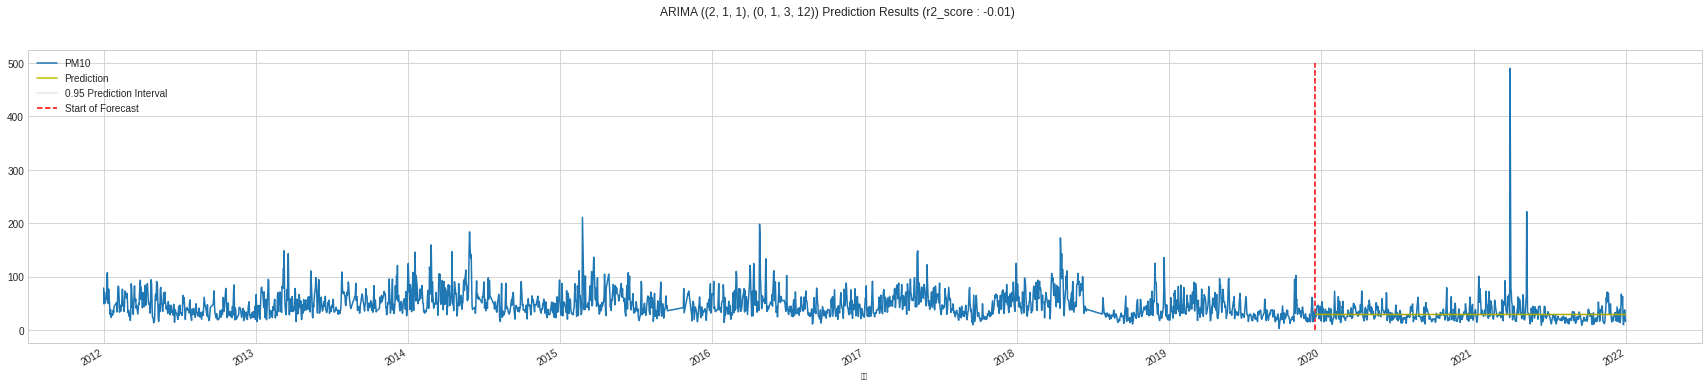

In [28]:
# 전체 데이터 구간으로 본 예측과 데이터
fig, ax = plt.subplots(figsize = (30,6))
data.plot(ax = ax);
ax.vlines('2019-12-17', 0 , 500 , linestyle = '--', color = 'r' , label = "Start of Forecast");
ax.plot(test_data.index , prediction , color = "y" , label= 'Prediction')
ax.plot(test_data.index , prediction , color = 'k' , alpha = 0.1 , label = "0.95 Prediction Interval")
ax.legend(loc = "upper left")
plt.suptitle(f"ARIMA {optimal[0][0]} Prediction Results (r2_score : {round(r2,2)})")
plt.show()

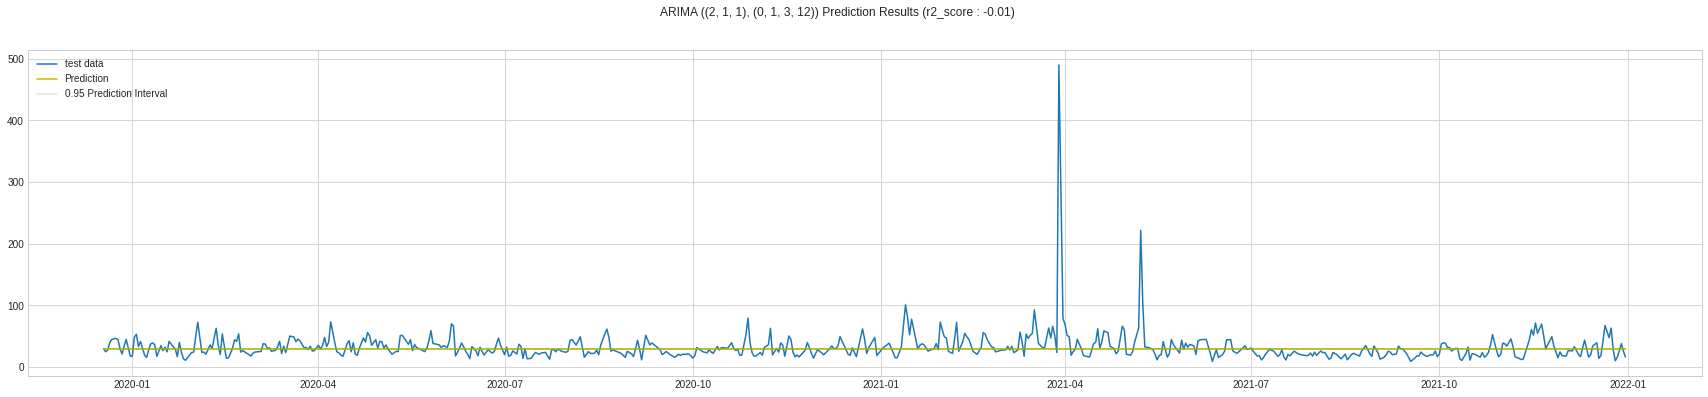

In [30]:
# 예측 구간으로 본 예측과 데이터

fig, ax = plt.subplots(figsize = (30,6))
ax.plot(test_data.index , test_data , label = "test data")
ax.plot(test_data.index , prediction , color = "y" , label= 'Prediction')
ax.plot(test_data.index , prediction , color = 'k' , alpha = 0.1 , label = "0.95 Prediction Interval")
ax.legend(loc = "upper left")
plt.suptitle(f"ARIMA {optimal[0][0]} Prediction Results (r2_score : {round(r2,2)})")
plt.show()

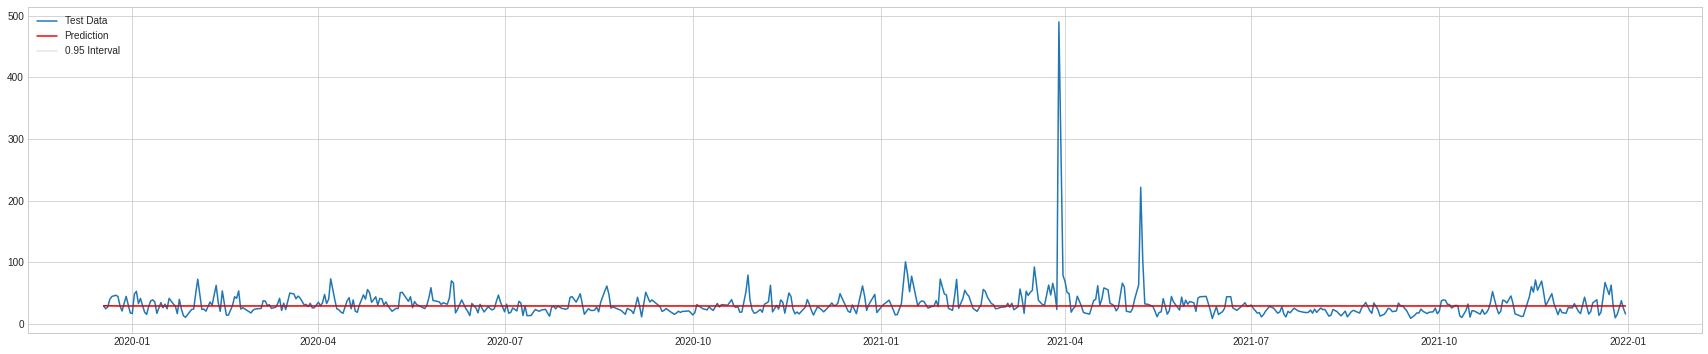

In [31]:
# 예측 구간 확대해서 본 예측과 데이터
fig , ax = plt.subplots(figsize = (30,6))
ax.plot(test_data.index , test_data , label = "Test Data")
ax.plot(test_data.index, prediction , color = "r" ,  label = "Prediction")
ax.plot(test_data.index , prediction, alpha = 0.1 , color = "k" , label = "0.95 Interval")
plt.legend(loc = "upper left")
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data)
print("ADF Statistic : %f" %result[0])
print('p-value: %f' %result[1])
print("Critical Values :")
for key, value in result[4].items():
  print("\t%s : %.3f " %(key, value))

ADF Statistic : -5.567452
p-value: 0.000001
Critical Values :
	1% : -3.433 
	5% : -2.863 
	10% : -2.567 


In [ ]:
# p-value < 0.05 , 귀무가설 기각
# 즉 정상성 만족

In [ ]:
# 계절성을 넣어보자

print("Examples of parameter combinations for Seasonal ARIMA...")
p = range(0,4)
d = range(1,2)
q = range(0,4)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0] , x[1] , x[2] , 12) for x in list(itertools.product(p,d,q))]

aic = []
params = []
for i in pdq :
  for j in seasonal_pdq :
    try :
      model = SARIMAX(train_data.values, order = (i) , seasonal_order = (j))
      model_fit = model.fit()
      print(f"SARIMA : {i}{j} >> AIC : {round(model_fit.aic , 2)}")
      aic.append(round(model_fit.aic, 2))
      params.append((i,j))
    except :
      continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMA : (0, 1, 0)(0, 1, 0, 12) >> AIC : 22070.7
SARIMA : (0, 1, 0)(0, 1, 1, 12) >> AIC : 20587.95
SARIMA : (0, 1, 0)(0, 1, 2, 12) >> AIC : 20588.88
SARIMA : (0, 1, 0)(0, 1, 3, 12) >> AIC : 20582.5
SARIMA : (0, 1, 0)(1, 1, 0, 12) >> AIC : 21532.73
SARIMA : (0, 1, 0)(1, 1, 1, 12) >> AIC : 20589.01
SARIMA : (0, 1, 0)(1, 1, 2, 12) >> AIC : 20587.44
SARIMA : (0, 1, 0)(1, 1, 3, 12) >> AIC : 20591.96
SARIMA : (0, 1, 0)(2, 1, 0, 12) >> AIC : 21226.81
SARIMA : (0, 1, 0)(2, 1, 1, 12) >> AIC : 20582.82
SARIMA : (0, 1, 0)(2, 1, 2, 12) >> AIC : 20592.14


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 0)(2, 1, 3, 12) >> AIC : 20581.27
SARIMA : (0, 1, 0)(3, 1, 0, 12) >> AIC : 21086.51
SARIMA : (0, 1, 0)(3, 1, 1, 12) >> AIC : 20584.82
SARIMA : (0, 1, 0)(3, 1, 2, 12) >> AIC : 20584.65


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 0)(3, 1, 3, 12) >> AIC : 20583.13
SARIMA : (0, 1, 1)(0, 1, 0, 12) >> AIC : 21892.11
SARIMA : (0, 1, 1)(0, 1, 1, 12) >> AIC : 20378.82
SARIMA : (0, 1, 1)(0, 1, 2, 12) >> AIC : 20380.7
SARIMA : (0, 1, 1)(0, 1, 3, 12) >> AIC : 20374.63
SARIMA : (0, 1, 1)(1, 1, 0, 12) >> AIC : 21334.35
SARIMA : (0, 1, 1)(1, 1, 1, 12) >> AIC : 20380.72
SARIMA : (0, 1, 1)(1, 1, 2, 12) >> AIC : 20382.21
SARIMA : (0, 1, 1)(1, 1, 3, 12) >> AIC : 20383.98
SARIMA : (0, 1, 1)(2, 1, 0, 12) >> AIC : 21050.83
SARIMA : (0, 1, 1)(2, 1, 1, 12) >> AIC : 20374.75
SARIMA : (0, 1, 1)(2, 1, 2, 12) >> AIC : 20384.06
SARIMA : (0, 1, 1)(2, 1, 3, 12) >> AIC : 20368.34
SARIMA : (0, 1, 1)(3, 1, 0, 12) >> AIC : 20889.75


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 1)(3, 1, 1, 12) >> AIC : 20375.46
SARIMA : (0, 1, 1)(3, 1, 2, 12) >> AIC : 20376.57
SARIMA : (0, 1, 1)(3, 1, 3, 12) >> AIC : 20381.47
SARIMA : (0, 1, 2)(0, 1, 0, 12) >> AIC : 21418.22
SARIMA : (0, 1, 2)(0, 1, 1, 12) >> AIC : 20009.55
SARIMA : (0, 1, 2)(0, 1, 2, 12) >> AIC : 20011.07


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 2)(0, 1, 3, 12) >> AIC : 20007.41
SARIMA : (0, 1, 2)(1, 1, 0, 12) >> AIC : 20899.87
SARIMA : (0, 1, 2)(1, 1, 1, 12) >> AIC : 20011.12
SARIMA : (0, 1, 2)(1, 1, 2, 12) >> AIC : 20013.19
SARIMA : (0, 1, 2)(1, 1, 3, 12) >> AIC : 20014.96
SARIMA : (0, 1, 2)(2, 1, 0, 12) >> AIC : 20649.15


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 2)(2, 1, 1, 12) >> AIC : 20007.45
SARIMA : (0, 1, 2)(2, 1, 2, 12) >> AIC : 20014.81
SARIMA : (0, 1, 2)(2, 1, 3, 12) >> AIC : 20006.3
SARIMA : (0, 1, 2)(3, 1, 0, 12) >> AIC : 20536.61


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 2)(3, 1, 1, 12) >> AIC : 20009.32
SARIMA : (0, 1, 2)(3, 1, 2, 12) >> AIC : 20010.03


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 2)(3, 1, 3, 12) >> AIC : 20011.9
SARIMA : (0, 1, 3)(0, 1, 0, 12) >> AIC : 21371.54
SARIMA : (0, 1, 3)(0, 1, 1, 12) >> AIC : 19974.72


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 3)(0, 1, 2, 12) >> AIC : 19975.43


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 3)(0, 1, 3, 12) >> AIC : 19971.75
SARIMA : (0, 1, 3)(1, 1, 0, 12) >> AIC : 20848.17
SARIMA : (0, 1, 3)(1, 1, 1, 12) >> AIC : 19975.54
SARIMA : (0, 1, 3)(1, 1, 2, 12) >> AIC : 19978.12


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 3)(1, 1, 3, 12) >> AIC : 19978.78
SARIMA : (0, 1, 3)(2, 1, 0, 12) >> AIC : 20584.67
SARIMA : (0, 1, 3)(2, 1, 1, 12) >> AIC : 19972.07
SARIMA : (0, 1, 3)(2, 1, 2, 12) >> AIC : 19978.96


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 3)(2, 1, 3, 12) >> AIC : 19974.68
SARIMA : (0, 1, 3)(3, 1, 0, 12) >> AIC : 20465.81


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 3)(3, 1, 1, 12) >> AIC : 19973.76
SARIMA : (0, 1, 3)(3, 1, 2, 12) >> AIC : 19974.15


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 3)(3, 1, 3, 12) >> AIC : 19977.02
SARIMA : (1, 1, 0)(0, 1, 0, 12) >> AIC : 21997.3
SARIMA : (1, 1, 0)(0, 1, 1, 12) >> AIC : 20498.67
SARIMA : (1, 1, 0)(0, 1, 2, 12) >> AIC : 20500.23
SARIMA : (1, 1, 0)(0, 1, 3, 12) >> AIC : 20492.86
SARIMA : (1, 1, 0)(1, 1, 0, 12) >> AIC : 21454.12
SARIMA : (1, 1, 0)(1, 1, 1, 12) >> AIC : 20500.33
SARIMA : (1, 1, 0)(1, 1, 2, 12) >> AIC : 20502.12
SARIMA : (1, 1, 0)(1, 1, 3, 12) >> AIC : 20503.53
SARIMA : (1, 1, 0)(2, 1, 0, 12) >> AIC : 21152.84
SARIMA : (1, 1, 0)(2, 1, 1, 12) >> AIC : 20493.16
SARIMA : (1, 1, 0)(2, 1, 2, 12) >> AIC : 20503.6


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 0)(2, 1, 3, 12) >> AIC : 20500.35
SARIMA : (1, 1, 0)(3, 1, 0, 12) >> AIC : 21004.62
SARIMA : (1, 1, 0)(3, 1, 1, 12) >> AIC : 20494.95
SARIMA : (1, 1, 0)(3, 1, 2, 12) >> AIC : 20495.22


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 0)(3, 1, 3, 12) >> AIC : 20504.56
SARIMA : (1, 1, 1)(0, 1, 0, 12) >> AIC : 21389.76
SARIMA : (1, 1, 1)(0, 1, 1, 12) >> AIC : 19990.33
SARIMA : (1, 1, 1)(0, 1, 2, 12) >> AIC : 19990.99
SARIMA : (1, 1, 1)(0, 1, 3, 12) >> AIC : 19987.21
SARIMA : (1, 1, 1)(1, 1, 0, 12) >> AIC : 20860.57
SARIMA : (1, 1, 1)(1, 1, 1, 12) >> AIC : 19991.25
SARIMA : (1, 1, 1)(1, 1, 2, 12) >> AIC : 19994.31
SARIMA : (1, 1, 1)(1, 1, 3, 12) >> AIC : 19994.43


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 1)(2, 1, 0, 12) >> AIC : 20588.01
SARIMA : (1, 1, 1)(2, 1, 1, 12) >> AIC : 19987.38
SARIMA : (1, 1, 1)(2, 1, 2, 12) >> AIC : 19994.59
SARIMA : (1, 1, 1)(2, 1, 3, 12) >> AIC : 19991.24
SARIMA : (1, 1, 1)(3, 1, 0, 12) >> AIC : 20458.97
SARIMA : (1, 1, 1)(3, 1, 1, 12) >> AIC : 19989.19
SARIMA : (1, 1, 1)(3, 1, 2, 12) >> AIC : 19989.63


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 1)(3, 1, 3, 12) >> AIC : 19993.02
SARIMA : (1, 1, 2)(0, 1, 0, 12) >> AIC : 21365.66
SARIMA : (1, 1, 2)(0, 1, 1, 12) >> AIC : 19972.92
SARIMA : (1, 1, 2)(0, 1, 2, 12) >> AIC : 19973.58


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 2)(0, 1, 3, 12) >> AIC : 19970.1
SARIMA : (1, 1, 2)(1, 1, 0, 12) >> AIC : 20840.72
SARIMA : (1, 1, 2)(1, 1, 1, 12) >> AIC : 19973.97
SARIMA : (1, 1, 2)(1, 1, 2, 12) >> AIC : 19976.72
SARIMA : (1, 1, 2)(1, 1, 3, 12) >> AIC : 19977.19
SARIMA : (1, 1, 2)(2, 1, 0, 12) >> AIC : 20571.58
SARIMA : (1, 1, 2)(2, 1, 1, 12) >> AIC : 19970.31
SARIMA : (1, 1, 2)(2, 1, 2, 12) >> AIC : 19977.2


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 2)(2, 1, 3, 12) >> AIC : 19973.33
SARIMA : (1, 1, 2)(3, 1, 0, 12) >> AIC : 20454.51


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 2)(3, 1, 1, 12) >> AIC : 19972.13
SARIMA : (1, 1, 2)(3, 1, 2, 12) >> AIC : 19972.62


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 2)(3, 1, 3, 12) >> AIC : 19975.06


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 3)(0, 1, 0, 12) >> AIC : 21367.39
SARIMA : (1, 1, 3)(0, 1, 1, 12) >> AIC : 19974.21


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 3)(0, 1, 2, 12) >> AIC : 19974.68


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 3)(0, 1, 3, 12) >> AIC : 19971.15


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 3)(1, 1, 0, 12) >> AIC : 20842.73
SARIMA : (1, 1, 3)(1, 1, 1, 12) >> AIC : 19974.92
SARIMA : (1, 1, 3)(1, 1, 2, 12) >> AIC : 19977.56


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 3)(1, 1, 3, 12) >> AIC : 19978.07


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 3)(2, 1, 0, 12) >> AIC : 20573.65
SARIMA : (1, 1, 3)(2, 1, 1, 12) >> AIC : 19971.2
SARIMA : (1, 1, 3)(2, 1, 2, 12) >> AIC : 19978.26


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 3)(2, 1, 3, 12) >> AIC : 19974.32
SARIMA : (1, 1, 3)(3, 1, 0, 12) >> AIC : 20456.4


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 3)(3, 1, 1, 12) >> AIC : 19973.21
SARIMA : (1, 1, 3)(3, 1, 2, 12) >> AIC : 19973.61


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (1, 1, 3)(3, 1, 3, 12) >> AIC : 19981.11
SARIMA : (2, 1, 0)(0, 1, 0, 12) >> AIC : 21860.95
SARIMA : (2, 1, 0)(0, 1, 1, 12) >> AIC : 20371.22
SARIMA : (2, 1, 0)(0, 1, 2, 12) >> AIC : 20372.45
SARIMA : (2, 1, 0)(0, 1, 3, 12) >> AIC : 20367.88
SARIMA : (2, 1, 0)(1, 1, 0, 12) >> AIC : 21309.51
SARIMA : (2, 1, 0)(1, 1, 1, 12) >> AIC : 20372.56
SARIMA : (2, 1, 0)(1, 1, 2, 12) >> AIC : 20374.62
SARIMA : (2, 1, 0)(1, 1, 3, 12) >> AIC : 20375.72
SARIMA : (2, 1, 0)(2, 1, 0, 12) >> AIC : 21019.42
SARIMA : (2, 1, 0)(2, 1, 1, 12) >> AIC : 20368.03
SARIMA : (2, 1, 0)(2, 1, 2, 12) >> AIC : 20375.63
SARIMA : (2, 1, 0)(2, 1, 3, 12) >> AIC : 20372.49
SARIMA : (2, 1, 0)(3, 1, 0, 12) >> AIC : 20872.09


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 0)(3, 1, 1, 12) >> AIC : 20369.78
SARIMA : (2, 1, 0)(3, 1, 2, 12) >> AIC : 20370.07


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 0)(3, 1, 3, 12) >> AIC : 20378.14
SARIMA : (2, 1, 1)(0, 1, 0, 12) >> AIC : 21364.76
SARIMA : (2, 1, 1)(0, 1, 1, 12) >> AIC : 19970.93


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 1)(0, 1, 2, 12) >> AIC : 19971.75


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 1)(0, 1, 3, 12) >> AIC : 19968.06
SARIMA : (2, 1, 1)(1, 1, 0, 12) >> AIC : 20841.27


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 1)(1, 1, 1, 12) >> AIC : 19971.88
SARIMA : (2, 1, 1)(1, 1, 2, 12) >> AIC : 19974.92


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 1)(1, 1, 3, 12) >> AIC : 19975.12
SARIMA : (2, 1, 1)(2, 1, 0, 12) >> AIC : 20572.22
SARIMA : (2, 1, 1)(2, 1, 1, 12) >> AIC : 19968.48
SARIMA : (2, 1, 1)(2, 1, 2, 12) >> AIC : 19975.32


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 1)(2, 1, 3, 12) >> AIC : 19971.45
SARIMA : (2, 1, 1)(3, 1, 0, 12) >> AIC : 20449.1


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 1)(3, 1, 1, 12) >> AIC : 19970.16
SARIMA : (2, 1, 1)(3, 1, 2, 12) >> AIC : 19970.54


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 1)(3, 1, 3, 12) >> AIC : 19974.39
SARIMA : (2, 1, 2)(0, 1, 0, 12) >> AIC : 21285.02


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 2)(0, 1, 1, 12) >> AIC : 19971.16


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 2)(0, 1, 2, 12) >> AIC : 19972.27


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 2)(0, 1, 3, 12) >> AIC : 19969.08
SARIMA : (2, 1, 2)(1, 1, 0, 12) >> AIC : 20799.6
SARIMA : (2, 1, 2)(1, 1, 1, 12) >> AIC : 19972.52
SARIMA : (2, 1, 2)(1, 1, 2, 12) >> AIC : 19974.88
SARIMA : (2, 1, 2)(1, 1, 3, 12) >> AIC : 19975.93


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 2)(2, 1, 0, 12) >> AIC : 20547.89
SARIMA : (2, 1, 2)(2, 1, 1, 12) >> AIC : 19968.11
SARIMA : (2, 1, 2)(2, 1, 2, 12) >> AIC : 19975.85


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 2)(2, 1, 3, 12) >> AIC : 19972.19
SARIMA : (2, 1, 2)(3, 1, 0, 12) >> AIC : 20456.25


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 2)(3, 1, 1, 12) >> AIC : 19970.67
SARIMA : (2, 1, 2)(3, 1, 2, 12) >> AIC : 19970.68


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 2)(3, 1, 3, 12) >> AIC : 19974.25


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 3)(0, 1, 0, 12) >> AIC : 21279.65
SARIMA : (2, 1, 3)(0, 1, 1, 12) >> AIC : 19972.79


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 3)(0, 1, 2, 12) >> AIC : 19974.23


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 3)(0, 1, 3, 12) >> AIC : 19969.65


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 3)(1, 1, 0, 12) >> AIC : 20791.57
SARIMA : (2, 1, 3)(1, 1, 1, 12) >> AIC : 19974.09


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 3)(1, 1, 2, 12) >> AIC : 19976.47
SARIMA : (2, 1, 3)(1, 1, 3, 12) >> AIC : 19977.6


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 3)(2, 1, 0, 12) >> AIC : 20539.31
SARIMA : (2, 1, 3)(2, 1, 1, 12) >> AIC : 19969.77
SARIMA : (2, 1, 3)(2, 1, 2, 12) >> AIC : 19977.52


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 3)(2, 1, 3, 12) >> AIC : 19973.43
SARIMA : (2, 1, 3)(3, 1, 0, 12) >> AIC : 20458.38


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 3)(3, 1, 1, 12) >> AIC : 19972.22


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 3)(3, 1, 2, 12) >> AIC : 19972.34


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (2, 1, 3)(3, 1, 3, 12) >> AIC : 19975.78
SARIMA : (3, 1, 0)(0, 1, 0, 12) >> AIC : 21786.62
SARIMA : (3, 1, 0)(0, 1, 1, 12) >> AIC : 20294.85
SARIMA : (3, 1, 0)(0, 1, 2, 12) >> AIC : 20296.15
SARIMA : (3, 1, 0)(0, 1, 3, 12) >> AIC : 20291.83
SARIMA : (3, 1, 0)(1, 1, 0, 12) >> AIC : 21233.13
SARIMA : (3, 1, 0)(1, 1, 1, 12) >> AIC : 20296.25
SARIMA : (3, 1, 0)(1, 1, 2, 12) >> AIC : 20297.86
SARIMA : (3, 1, 0)(1, 1, 3, 12) >> AIC : 20298.93
SARIMA : (3, 1, 0)(2, 1, 0, 12) >> AIC : 20946.3
SARIMA : (3, 1, 0)(2, 1, 1, 12) >> AIC : 20291.9
SARIMA : (3, 1, 0)(2, 1, 2, 12) >> AIC : 20298.95
SARIMA : (3, 1, 0)(2, 1, 3, 12) >> AIC : 20302.76
SARIMA : (3, 1, 0)(3, 1, 0, 12) >> AIC : 20794.68
SARIMA : (3, 1, 0)(3, 1, 1, 12) >> AIC : 20293.52
SARIMA : (3, 1, 0)(3, 1, 2, 12) >> AIC : 20293.33


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 0)(3, 1, 3, 12) >> AIC : 20303.21
SARIMA : (3, 1, 1)(0, 1, 0, 12) >> AIC : 21366.75
SARIMA : (3, 1, 1)(0, 1, 1, 12) >> AIC : 19972.11


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 1)(0, 1, 2, 12) >> AIC : 19972.98


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 1)(0, 1, 3, 12) >> AIC : 19968.96
SARIMA : (3, 1, 1)(1, 1, 0, 12) >> AIC : 20842.81
SARIMA : (3, 1, 1)(1, 1, 1, 12) >> AIC : 19973.23
SARIMA : (3, 1, 1)(1, 1, 2, 12) >> AIC : 19975.71
SARIMA : (3, 1, 1)(1, 1, 3, 12) >> AIC : 19976.46
SARIMA : (3, 1, 1)(2, 1, 0, 12) >> AIC : 20573.66
SARIMA : (3, 1, 1)(2, 1, 1, 12) >> AIC : 19969.24
SARIMA : (3, 1, 1)(2, 1, 2, 12) >> AIC : 19976.53


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 1)(2, 1, 3, 12) >> AIC : 19972.74
SARIMA : (3, 1, 1)(3, 1, 0, 12) >> AIC : 20449.68


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 1)(3, 1, 1, 12) >> AIC : 19971.02
SARIMA : (3, 1, 1)(3, 1, 2, 12) >> AIC : 19971.5


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 1)(3, 1, 3, 12) >> AIC : 19979.41
SARIMA : (3, 1, 2)(0, 1, 0, 12) >> AIC : 21277.82
SARIMA : (3, 1, 2)(0, 1, 1, 12) >> AIC : 19974.58
SARIMA : (3, 1, 2)(0, 1, 2, 12) >> AIC : 19975.57


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 2)(0, 1, 3, 12) >> AIC : 19971.57
SARIMA : (3, 1, 2)(1, 1, 0, 12) >> AIC : 20790.68
SARIMA : (3, 1, 2)(1, 1, 1, 12) >> AIC : 19975.98
SARIMA : (3, 1, 2)(1, 1, 2, 12) >> AIC : 19978.12


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 2)(1, 1, 3, 12) >> AIC : 19979.0


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 2)(2, 1, 0, 12) >> AIC : 20538.89


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 2)(2, 1, 1, 12) >> AIC : 19971.61


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 2)(2, 1, 2, 12) >> AIC : 19979.02


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 2)(2, 1, 3, 12) >> AIC : 19974.88


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 2)(3, 1, 0, 12) >> AIC : 20423.93


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 2)(3, 1, 1, 12) >> AIC : 19973.56


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 2)(3, 1, 2, 12) >> AIC : 19973.89


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 2)(3, 1, 3, 12) >> AIC : 19977.06


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(0, 1, 0, 12) >> AIC : 21253.86
SARIMA : (3, 1, 3)(0, 1, 1, 12) >> AIC : 19974.21
SARIMA : (3, 1, 3)(0, 1, 2, 12) >> AIC : 19975.4


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(0, 1, 3, 12) >> AIC : 19971.69


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(1, 1, 0, 12) >> AIC : 20733.56


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(1, 1, 1, 12) >> AIC : 19975.45


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(1, 1, 2, 12) >> AIC : 19977.87


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(1, 1, 3, 12) >> AIC : 19978.96


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(2, 1, 0, 12) >> AIC : 20558.25


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(2, 1, 1, 12) >> AIC : 19971.17


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(2, 1, 2, 12) >> AIC : 19979.16


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(2, 1, 3, 12) >> AIC : 19975.35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(3, 1, 0, 12) >> AIC : 20453.85


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(3, 1, 1, 12) >> AIC : 19973.67


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(3, 1, 2, 12) >> AIC : 19974.02


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (3, 1, 3)(3, 1, 3, 12) >> AIC : 19977.52


In [ ]:
optimal = [(params[i] , j) for i,j in enumerate(aic) if j == min(aic)]
optimal

[(((2, 1, 1), (0, 1, 3, 12)), 19968.06)]

In [14]:
optimal = [(((2,1,1), (0,1,3,12)) , 19968.06)]

In [34]:
model_opt = SARIMAX(train_data, order = (2,1,1) , seasonal_order = (0,1,3,12) , 
                    enforce_stationarity = True ,
                    endforce_invertibility = True)
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                       PM10   No. Observations:                 2312
Model:             SARIMAX(2, 1, 1)x(0, 1, [1, 2, 3], 12)   Log Likelihood               -9977.030
Date:                                    Sat, 27 Aug 2022   AIC                          19968.060
Time:                                            12:11:21   BIC                          20008.242
Sample:                                                 0   HQIC                         19982.710
                                                   - 2312                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5006      0.018     27.144      0.000       0.464       0.537
ar.L2         -0.0997      0.019     -5.185      0.000      -0.137      -0.062
ma.L1         -0.9414      0.009   -104.196      0.000      -0.959      -0.924
ma.S.L12      -0.9788      0.187     -5.246      0.000      -1.345      -0.613
ma.S.L24      -0.0714      0.027     -2.648      0.008      -0.124      -0.019
ma.S.L36       0.0506      0.020      2.509      0.012       0.011       0.090
sigma2       334.4850     62.041      5.391      0.000     212.886     456.084
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4313.93
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
prediction.conf_int()

,lower PM10,upper PM10
2312,-6.860099,65.003946
2313,-12.476503,69.861359
2314,-12.404756,71.702662
2315,-13.886341,70.679524
2316,-14.164076,70.682586
...,...,...
2886,-77.650092,124.133163
2887,-79.629570,122.324919
2888,-80.230435,121.910720
2889,-80.267001,122.053792


In [48]:
prediction = model_opt_fit.get_forecast(len(test_data))
predicted_value = prediction.predicted_mean
predicted_ub = prediction.conf_int()["upper PM10"]
predicted_lb = prediction.conf_int()["lower PM10"]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


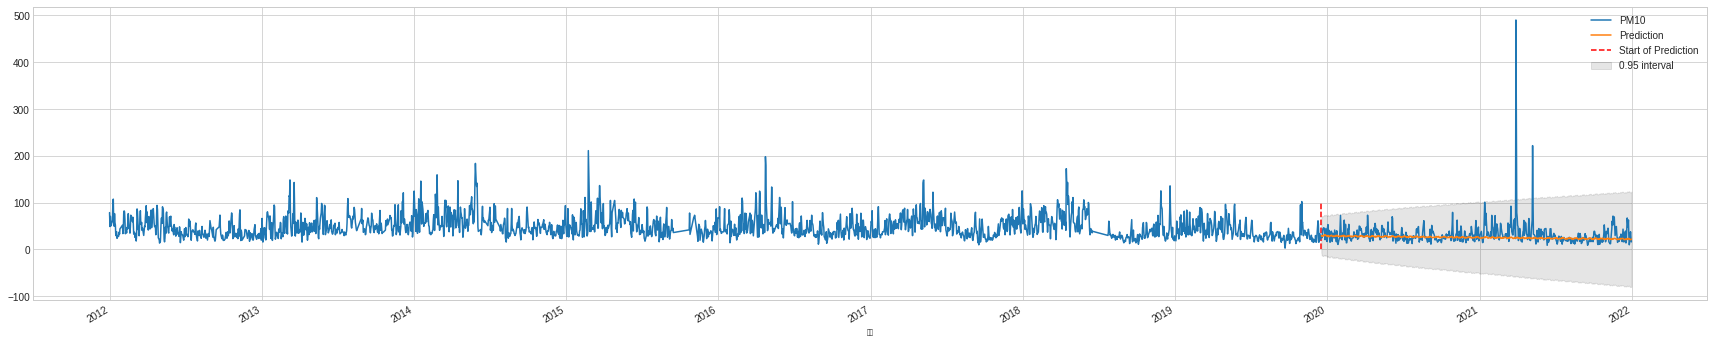

In [49]:
# 전체 데이터 범위 예측값 표기

fig, ax = plt.subplots(figsize=(30,6))
data.plot(ax=ax);
flag = test_data.index[0]
ax.vlines(flag , 0 , 100 , linestyle = "--" , color = 'r' , label = "Start of Prediction")
ax.plot(predict_index, predicted_value, label = "Prediction")
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = "k" , alpha = 0.1 , label = "0.95 interval")
ax.legend()
plt.show()

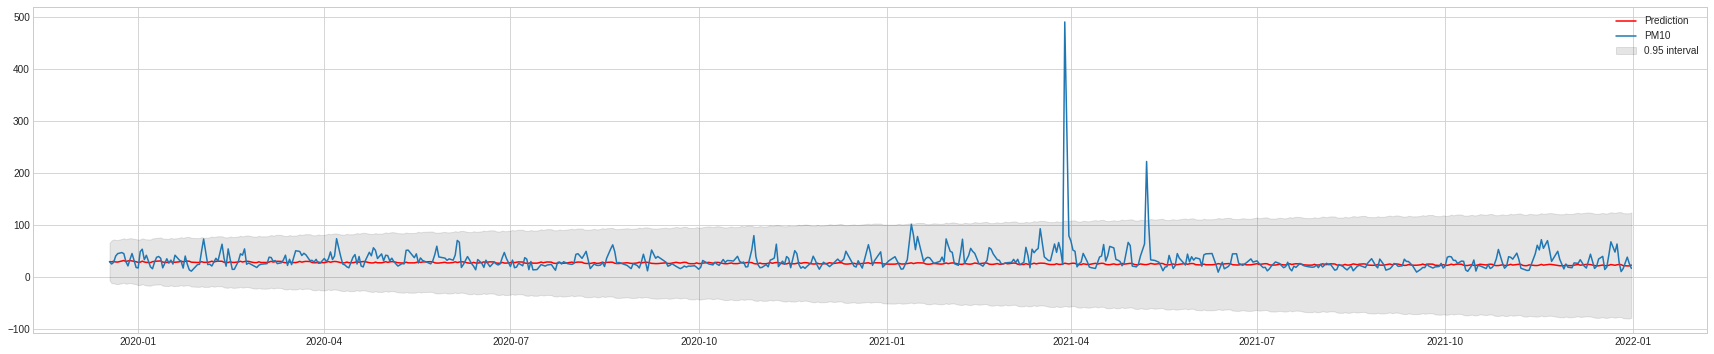

In [50]:
# 예측 구간 데이터 그려주기

fig, ax = plt.subplots(figsize=(30,6))
ax.plot(predict_index, predicted_value, color = 'r' ,label = "Prediction")
ax.plot(predict_index, test_data, label = "PM10")
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = "k" , alpha = 0.1 , label = "0.95 interval")
ax.legend()
plt.show()
